# Laplace

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing library
%matplotlib inline

from scipy.stats import laplace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df= pd.read_excel("/content/laplace.xlsx") 
df=df.dropna() 
loc1, scale1 =laplace.fit(pd.to_numeric(df['Return']))
rv=laplace(loc1, scale1)

In [ ]:
df.head()

,Unnamed: 0,S&P 500,Return,Absolute deviation,Rank,Ranked return,Empirical CDF,Normal CDF,Laplace CDF
1,2015-02-01 00:00:00,2058.2,0.0314,0.0310,1,-0.0834,0.000795,1.080000e-17,0.0000
2,2015-05-01 00:00:00,2020.58,0.0450,0.0446,2,-0.0431,0.001590,5.070583e-06,0.0014
3,2015-06-01 00:00:00,2002.61,-0.0207,0.0211,3,-0.0378,0.002385,5.248912e-05,0.0029
4,2015-07-01 00:00:00,2025.9,-0.0014,0.0018,4,-0.0365,0.003180,8.931191e-05,0.0034
5,2015-08-01 00:00:00,2062.14,0.0131,0.0127,5,-0.0347,0.003975,1.814732e-04,0.0044


In [ ]:
df.describe()

,Return,Absolute deviation,Ranked return,Empirical CDF,Normal CDF,Laplace CDF
count,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000
mean,0.002769,0.013908,-0.022424,0.019873,2.241303e-02,0.032857
std,0.017424,0.010576,0.010760,0.011358,1.425991e-02,0.015471
min,-0.036500,0.000300,-0.083400,0.000795,1.080000e-17,0.000000
25%,-0.009400,0.004500,-0.021200,0.010334,1.383194e-02,0.027100
50%,0.001000,0.012700,-0.019100,0.019873,2.330103e-02,0.036000
75%,0.013900,0.019200,-0.017600,0.029412,3.300293e-02,0.044100
max,0.045000,0.044600,-0.016100,0.038951,4.581430e-02,0.054000


In [ ]:
df=df.drop(range(100,1259))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


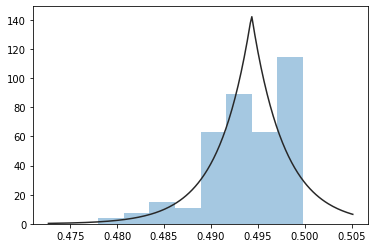

In [ ]:
import seaborn as sns 
from scipy import stats
sns.distplot(laplace.pdf(df['Return']), fit=stats.laplace, kde=False);

- Lowest value is 0.0314 but till 0.075 the x axis value is zero so it is touching the x-axis
- It started increasing after 0.475 till 0.495, where 0.495 is the peak data point.
- It decreses till 0.505 where skewness will always be 0.

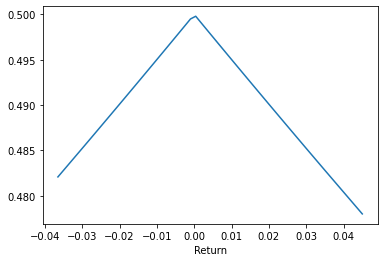

In [ ]:
sns.lineplot(data=df, x="Return", y=laplace.pdf(df["Return"]))

- Skewness wil always be zero, that's why we are getting pdf of return values in zeroth skewness.

- Here we can see the numerical discrete data only of pdf of return values (not continous values) and it also organizes the data by indicating the occurances of each value on a number line.


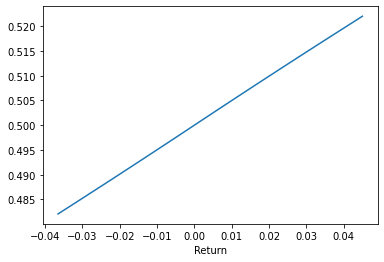

In [ ]:
sns.lineplot(data=df, x="Return", y=laplace.cdf(df["Return"]))

- cdf of laplace is the integral value of pdf, so whatever value we got in discrete way, will be giving us a straight line which is increasing that means the laplace cdf value starting from 0 to 0.04.

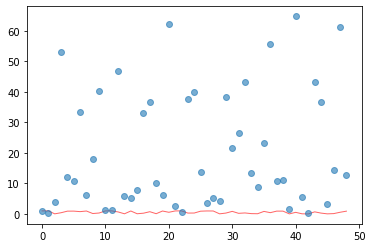

In [ ]:
plt.plot(rv.cdf(df['Return']),'r', rv.pdf(df['Return']), 'o', lw=1, alpha=0.6, label='laplace pdf');

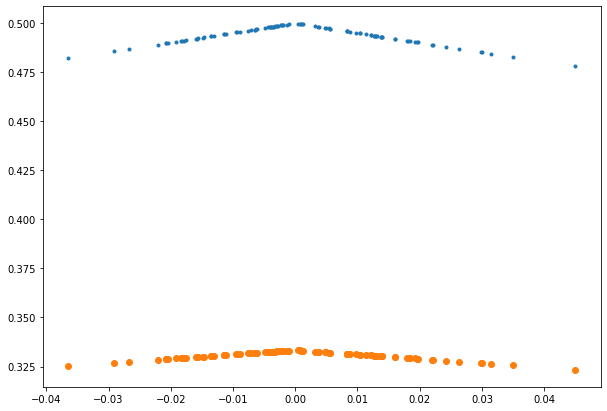

In [ ]:
y1 = laplace.pdf(df['Return'], 0,1) 
y2 = laplace.pdf(df['Return'], 0, 1.5) 
plt.figure(figsize=(10, 7))
plt.plot(df['Return'], y1, ".", df['Return'], y2, "o") ;

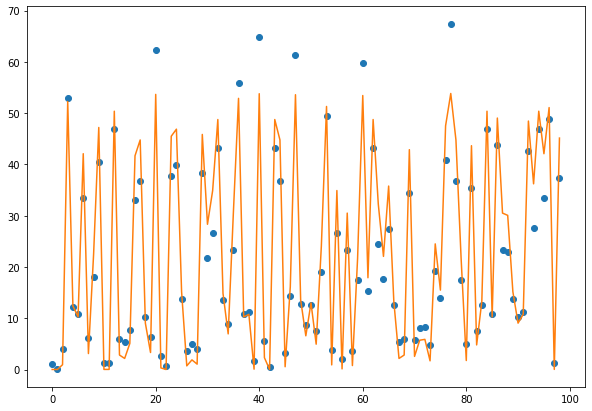

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(10, 7))

plt.plot(rv.pdf(df['Return']),'o', norm.pdf(df['Return'], loc1, scale1))

In [ ]:
print('Mean',loc1*100, "\nStandard deviation",scale1*100)

Mean 0.04 
Standard deviation 0.74120826709062


In [ ]:
mean, var, skew, kurt = laplace.stats(loc1*100, scale1*100,moments='mvsk')
print('Skewness',skew,'\nKurtosis',kurt,'\nVariance',var)

Skewness 0.0 
Kurtosis 3.0 
Variance 1.0987793904069598


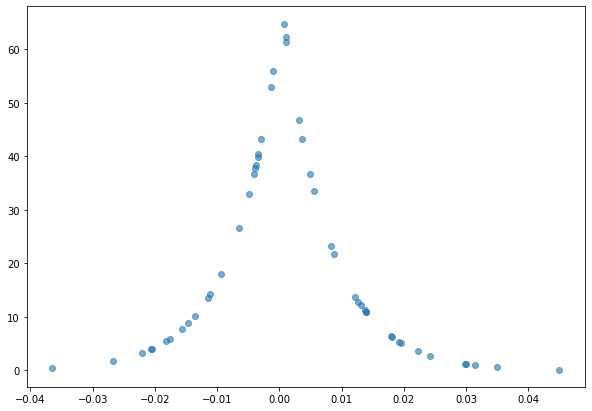

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(df['Return'], laplace.pdf(df['Return'],loc=loc1, scale=scale1), 'o', lw=1, alpha=0.6, label='laplace pdf')


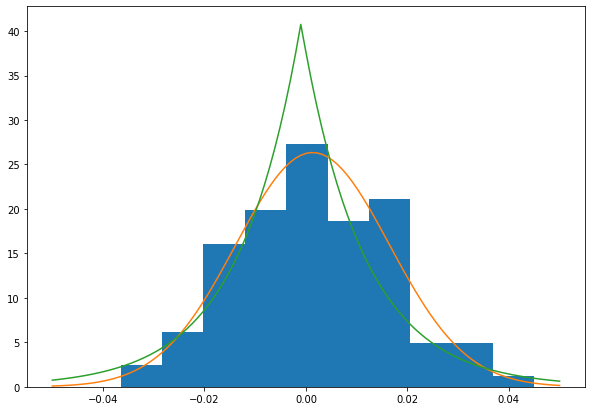

In [ ]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt


plt.figure(figsize=(10, 7))

# plot normed histogram
plt.hist(df['Return'], density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df['Return']))

# lets try the normal distribution first
m, s = stats.norm.fit(df['Return']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg = stats.laplace.fit(df['Return'])  
pdf_laplace = stats.laplace.pdf(lnspc, ag, bg)  
plt.plot(lnspc, pdf_laplace, label="Laplace")

- green line represents laplace distribution 
- orange line represents normal distribtuion
- blue show the histogram of the values

- Value of skewness is there in the normal distribution curve and not in the laplace distribution curve.

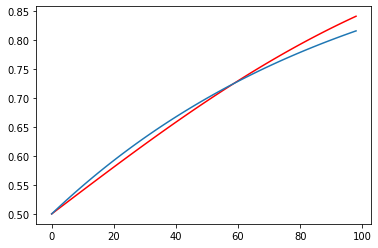

In [ ]:
from scipy import stats  
xt = plt.xticks()[0]  
#df=df.drop(range(50,80))
m, s = stats.norm.fit(df['Return'])
plt.plot(stats.norm.cdf(lnspc,0,1),'r',laplace.cdf(lnspc,0,1));

- blue line represents laplace cdf  
- red line represents normal cdf

- they are almost overlapping each other; they don't have much difference between the cdf data points.

In [ ]:
laplace.pdf(df['Return'])

array([0.48454393, 0.47799874, 0.48975639, 0.49930049, 0.49349272,
       0.49309808, 0.49720783, 0.49103141, 0.49532202, 0.49830289,
       0.48522277, 0.48527129, 0.4984524 , 0.49127699, 0.49049157,
       0.4922113 , 0.49755599, 0.49755599, 0.49324603, 0.49112963,
       0.49950025, 0.48804524, 0.48280271, 0.4980538 , 0.49825306,
       0.49393706, 0.4890223 , 0.49029542, 0.48990334, 0.49810361,
       0.4956193 , 0.49676054, 0.4985521 , 0.49428294, 0.49275303,
       0.49586717, 0.49950025, 0.49309808, 0.49319671, 0.48682665,
       0.49965012, 0.49098231, 0.48207905, 0.49815342, 0.4979542 ,
       0.48907121, 0.49448069, 0.4994503 , 0.49369015])

In [ ]:
m, s = stats.norm.fit(df['Return']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(df['Return'], m, s)
pdf_g

array([ 5.83074026,  1.15362367,  9.16351733, 22.46712771, 19.33379691,
       18.78369974, 22.82391539, 15.58238051, 18.0346972 , 21.69950057,
        6.65006642,  6.71112294, 23.1291998 , 11.51570175, 14.69346184,
       13.03680659, 20.95526046, 22.95756764, 14.74315392, 15.74280398,
       23.01200697, 10.68812027,  4.03409809, 21.46656673, 21.65416866,
       19.9206283 , 12.26228429, 14.36844569,  9.38162922, 21.51439939,
       21.76135508, 20.0218579 , 21.91653071, 16.42742944, 13.93015236,
       21.97387642, 22.58739613, 18.78369974, 18.92355643,  5.37206378,
       22.96749479, 11.0453678 ,  1.73093037, 23.09979226, 21.36906451,
        8.17804493, 16.7412498 , 23.02531502, 19.59903486])